In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(final_data):
    report = np.empty([4,6])
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        clf = RandomForestClassifier(n_estimators=10)
        clf.fit(x_train,y_train)
        predictions = clf.predict(x_test)
        report[0,i] = classification_report(y_test,predictions,output_dict = True).get('accuracy')
        report[1,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
        report[2,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
        report[3,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('f1-score')
        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
        
    for j in range(4):
        report[j,5] = np.max(report[j,0:5])
    columns1 = ['Validation 1','Validation 2','Validation 3','Validation 4','Validation 5','Maximum']
    index1 = ['Accuracy','Precision','Recall','F1-Score']
    table = pd.DataFrame(data = report,columns=columns1,index=index1)
    display(table)

## Mean

In [4]:
# Mean
evaluate(final_data1)

Confusion matrix:
 [[74  1]
 [ 6 33]]
Confusion matrix:
 [[66  3]
 [ 6 39]]
Confusion matrix:
 [[67  2]
 [ 3 42]]
Confusion matrix:
 [[73  2]
 [ 4 35]]
Confusion matrix:
 [[63  5]
 [ 5 41]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.938596,0.921053,0.956140,0.947368,0.912281,0.956140
Precision,0.947794,0.922619,0.955844,0.946999,0.908887,0.955844
Recall,0.916410,0.911594,0.952174,0.935385,0.908887,0.952174
F1-Score,0.929474,0.916361,0.953925,0.940789,0.908887,0.953925


## Standard Error

In [5]:
# Standard Error
evaluate(final_data2)

Confusion matrix:
 [[75  0]
 [ 9 30]]
Confusion matrix:
 [[66  3]
 [12 33]]
Confusion matrix:
 [[66  3]
 [12 33]]
Confusion matrix:
 [[67  8]
 [ 8 31]]
Confusion matrix:
 [[66  2]
 [14 32]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.921053,0.868421,0.868421,0.859649,0.859649,0.921053
Precision,0.946429,0.881410,0.881410,0.844103,0.883088,0.946429
Recall,0.884615,0.844928,0.844928,0.844103,0.833120,0.884615
F1-Score,0.906481,0.856387,0.856387,0.844103,0.845946,0.906481


## Maximum

In [6]:
# Maximum
evaluate(final_data3)

Confusion matrix:
 [[74  1]
 [ 0 39]]
Confusion matrix:
 [[67  2]
 [ 4 41]]
Confusion matrix:
 [[68  1]
 [ 3 42]]
Confusion matrix:
 [[72  3]
 [ 2 37]]
Confusion matrix:
 [[64  4]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.991228,0.947368,0.964912,0.956140,0.938596,0.991228
Precision,0.987500,0.948575,0.967245,0.948986,0.935059,0.987500
Recall,0.993333,0.941063,0.959420,0.954359,0.937980,0.993333
F1-Score,0.990315,0.944481,0.962987,0.951576,0.936440,0.990315


## Mean and Standard Error

In [7]:
# Mean and Standard Error
evaluate(final_data4)

Confusion matrix:
 [[75  0]
 [ 8 31]]
Confusion matrix:
 [[69  0]
 [ 7 38]]
Confusion matrix:
 [[68  1]
 [ 5 40]]
Confusion matrix:
 [[70  5]
 [ 4 35]]
Confusion matrix:
 [[64  4]
 [ 4 42]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.929825,0.938596,0.947368,0.921053,0.929825,0.947368
Precision,0.951807,0.953947,0.953558,0.910473,0.927110,0.953947
Recall,0.897436,0.922222,0.937198,0.915385,0.927110,0.937198
F1-Score,0.917541,0.933693,0.943990,0.912837,0.927110,0.943990


## Standard Error and Maximum

In [8]:
# Standard Error and Maximum
evaluate(final_data5)

Confusion matrix:
 [[74  1]
 [ 2 37]]
Confusion matrix:
 [[68  1]
 [ 5 40]]
Confusion matrix:
 [[66  3]
 [ 5 40]]
Confusion matrix:
 [[72  3]
 [ 2 37]]
Confusion matrix:
 [[64  4]
 [ 2 44]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.973684,0.947368,0.929825,0.956140,0.947368,0.973684
Precision,0.973684,0.953558,0.929905,0.948986,0.943182,0.973684
Recall,0.967692,0.937198,0.922705,0.954359,0.948849,0.967692
F1-Score,0.970586,0.943990,0.925974,0.951576,0.945697,0.970586


## Mean and Maximum

In [9]:
# Mean and Maximum
evaluate(final_data6)

Confusion matrix:
 [[73  2]
 [ 2 37]]
Confusion matrix:
 [[69  0]
 [ 4 41]]
Confusion matrix:
 [[68  1]
 [ 3 42]]
Confusion matrix:
 [[74  1]
 [ 2 37]]
Confusion matrix:
 [[64  4]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.964912,0.964912,0.964912,0.973684,0.938596,0.973684
Precision,0.961026,0.972603,0.967245,0.973684,0.935059,0.973684
Recall,0.961026,0.955556,0.959420,0.967692,0.937980,0.967692
F1-Score,0.961026,0.962660,0.962987,0.970586,0.936440,0.970586


## Mean, Standard Error and Maximum

In [10]:
# Mean, Standard Error and Maximum
evaluate(final_data7)

Confusion matrix:
 [[75  0]
 [ 4 35]]
Confusion matrix:
 [[67  2]
 [ 5 40]]
Confusion matrix:
 [[67  2]
 [ 5 40]]
Confusion matrix:
 [[74  1]
 [ 3 36]]
Confusion matrix:
 [[64  4]
 [ 4 42]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.964912,0.938596,0.938596,0.964912,0.929825,0.964912
Precision,0.974684,0.941468,0.941468,0.967006,0.927110,0.974684
Recall,0.948718,0.929952,0.929952,0.954872,0.927110,0.954872
F1-Score,0.959986,0.934947,0.934947,0.960526,0.927110,0.960526


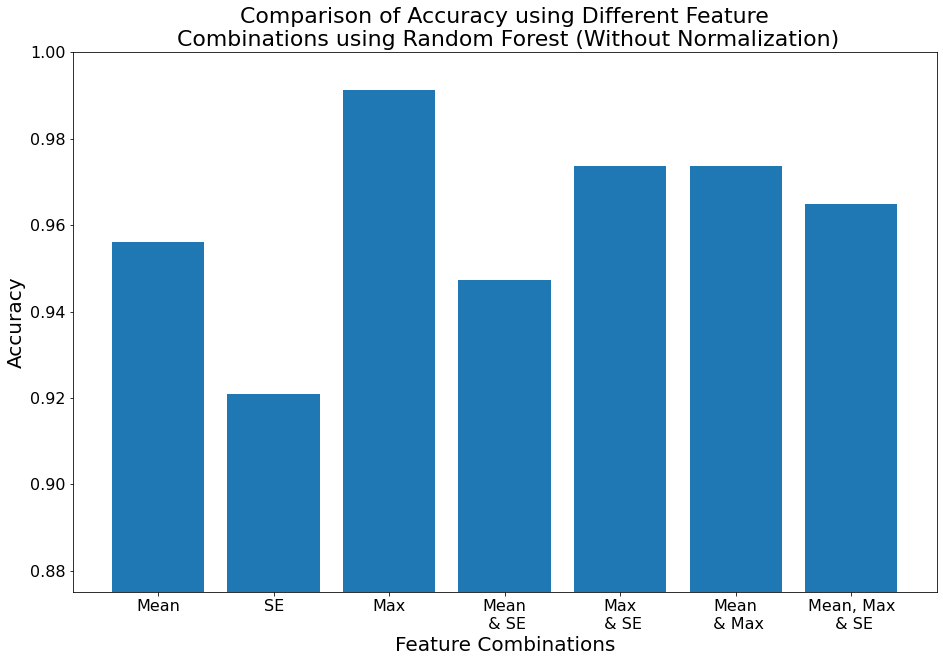

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1.5,1.5])
plt.rcParams["font.family"] = "Times New Roman"
feature_comb = ['Mean', 'SE', 'Max', 'Mean\n & SE', 'Max\n & SE', 'Mean\n & Max', 'Mean, Max\n & SE']
accuracy = [0.9561,0.9210,0.9912,0.9474,0.9737,0.9737,0.9649]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations',fontsize = 20)
ax.set_ylabel('Accuracy',fontsize = 20)
ax.set_title('Comparison of Accuracy using Different Feature\n Combinations using Random Forest (Without Normalization)',fontsize = 22)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_ylim([0.875,1])
plt.tight_layout()
plt.show()